In [11]:
import os
import tempfile
import torch
from pathlib import Path
from csv import writer
from torch.utils.data import DataLoader
from tqdm import trange, tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [12]:
columns = ['timeSec1970', 'timeMs', 'appId', 'ipAddrClient', 'ipAddrServer',
           'portClient', 'portServer', 'protocol', 'ppiLen', 'ppi-pdt',
           'ppi-pd', 'ppi-ps', 'ppi-paux']
csv_path = Path('/home/anatbr/dataset/Allot/ver02 - Location 01 - 2024.09.06-09.csv G Z')
n_rows_per_ds = 1e4

# get CSVs

In [22]:
ranges = []
for i in trange(200):
    df = pd.read_csv(csv_path, nrows=n_rows_per_ds, skiprows=int(n_rows_per_ds * (i + 1)))
    df.columns = columns
    df['absoluteTime'] = pd.to_datetime(df['timeSec1970'], unit='s')
    break
    assert df.absoluteTime.is_monotonic_increasing
    df.to_csv(f'data/allot_chunks_csvs/chunk_{i:03d}.csv', index=False)
    # print(df.absoluteTime.min(), df.absoluteTime.max())
    ranges.append((df.absoluteTime.min(), df.absoluteTime.max()))
    

  0%|          | 0/200 [00:00<?, ?it/s]


In [ ]:
df['ppi-pdt'] = df['ppi-pdt'].apply(lambda x: list(map(int, re.findall(r'\d+', x))))
df['ppi-pd'] = df['ppi-pd'].apply(lambda x: list(map(int, re.findall(r'\d+', x))))
df['ppi-ps'] = df['ppi-ps'].apply(lambda x: list(map(int, re.findall(r'\d+', x))))
df['ppi-paux'] = df['ppi-paux'].apply(lambda x: list(map(int, re.findall(r'\d+', x))))

In [ ]:
ppi-pdt	ppi-pd	ppi-ps	ppi-paux

,timeSec1970,timeMs,appId,ipAddrClient,ipAddrServer,portClient,portServer,protocol,ppiLen,ppi-pdt,ppi-pd,ppi-ps,ppi-paux,absoluteTime
0,1725548380,272,1448,230.100.159.96,222.218.202.137,42931,443,17,10,"[0, 3, 4, 4, 33, 36, 38, 38, 58, 63]",[0 1 1 1 0 0 1 1 0 1],[1250 1250 1250 450 1250 163 518 121 31 ...,[207 206 234 234 199 234 71 65 70 69],2024-09-05 14:59:40


In [1]:
from data_utils.csv_dataloader import create_csv_flowpic_loader
from tqdm import tqdm

In [ ]:
# Ensure the path is resolved correctly
import os
chunk_path = os.path.join('data', 'allot_chunks_csvs', 'chunk_000.csv')
loader = create_csv_flowpic_loader([chunk_path], batch_size=1, num_workers=0, shuffle=False, resolution=64)

In [ ]:
for sessions, labels, in tqdm(loader):
    break

  0%|          | 0/10000 [00:00<?, ?it/s]


In [ ]:
sessions[0].sum()

tensor(10.)

In [ ]:
loader.dataset.sessions[0]

([0, 3, 4, 4, 33, 36, 38, 38, 58, 63],
 [1250, 1250, 1250, 450, 1250, 163, 518, 121, 31, 24])

In [ ]:
sessions.shape

torch.Size([1, 1, 1500, 1500])

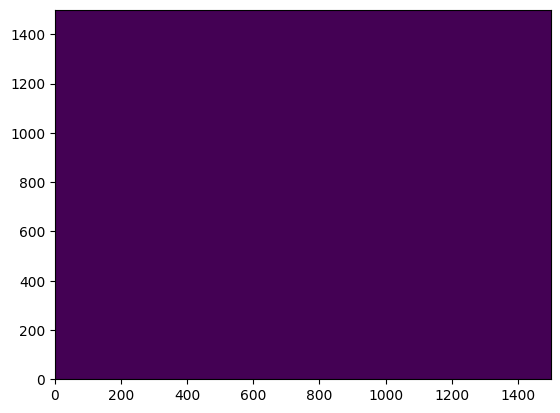

In [ ]:
import matplotlib.pyplot as plt
plt.pcolormesh(sessions[0, 0].numpy(), cmap='viridis')